In [3]:
import random
import pandas as pd

# Các chủ đề
topics = ["smartphone", "clothes", "laptops", "shoes", "books"]
comments_templates = [
    "I love my new {topic}!",
    "The {topic} I bought is amazing.",
    "Not happy with the {topic}.",
    "Thinking of buying a {topic}.",
    "Do you recommend any good {topic}?",
    "I found a great deal on {topic}.",
    "Why is this {topic} so expensive?",
    "The quality of this {topic} is not great.",
    "Very satisfied with my {topic}.",
    "Looking forward to using this {topic}!"
]

# Tạo danh sách người dùng
users = [f"user_{i}" for i in range(1, 501)]

# Tạo dữ liệu comment
comments_data = []
for user in users:
    for _ in range(50):  # Mỗi user 50 comment
        topic = random.choice(topics)
        comment_template = random.choice(comments_templates)
        comment = comment_template.format(topic=topic)
        timestamp = pd.Timestamp(
            year=random.randint(2020, 2023),
            month=random.randint(1, 12),
            day=random.randint(1, 28),
            hour=random.randint(0, 23),
            minute=random.randint(0, 59),
            second=random.randint(0, 59),
        )
        comments_data.append({"User": user, "Comment": comment, "Topic": topic, "Timestamp": timestamp})

# Chuyển thành DataFrame
df_comments = pd.DataFrame(comments_data)

# Lưu dữ liệu vào file CSV
file_path = "user_comments_updated.csv"
df_comments.to_csv(file_path, index=False)

print(f"Data saved to {file_path}")


Data saved to user_comments_updated.csv


<Figure size 1400x800 with 0 Axes>

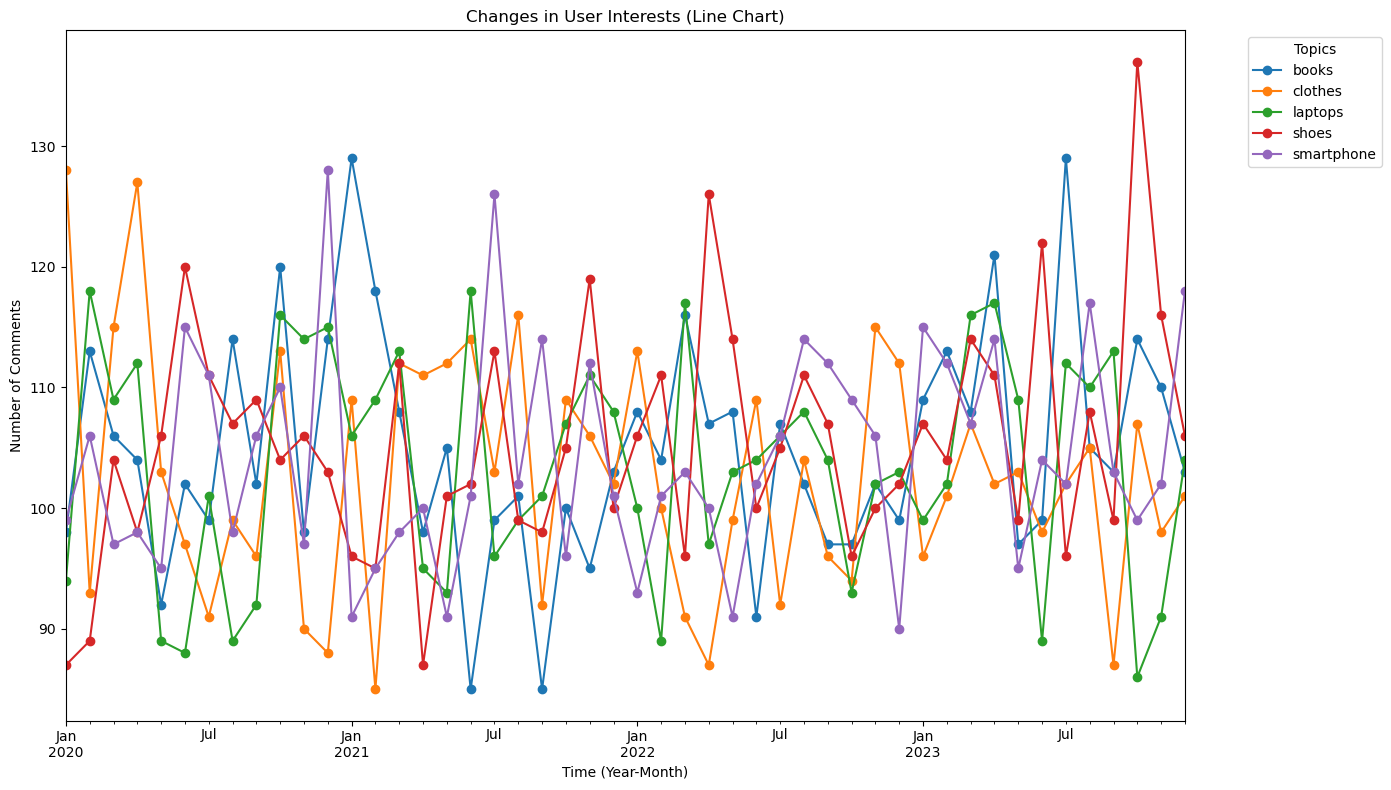

<Figure size 1400x800 with 0 Axes>

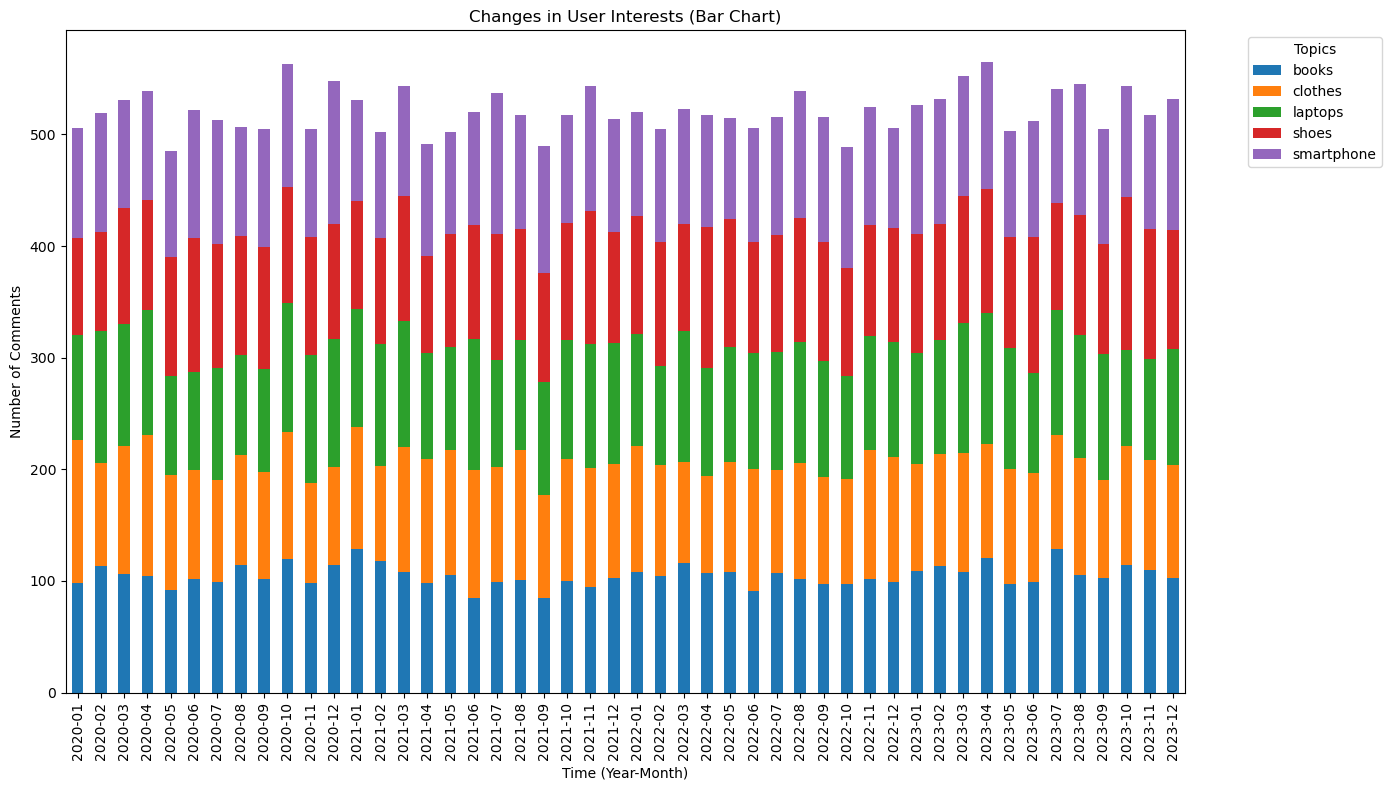

<Figure size 1400x800 with 0 Axes>

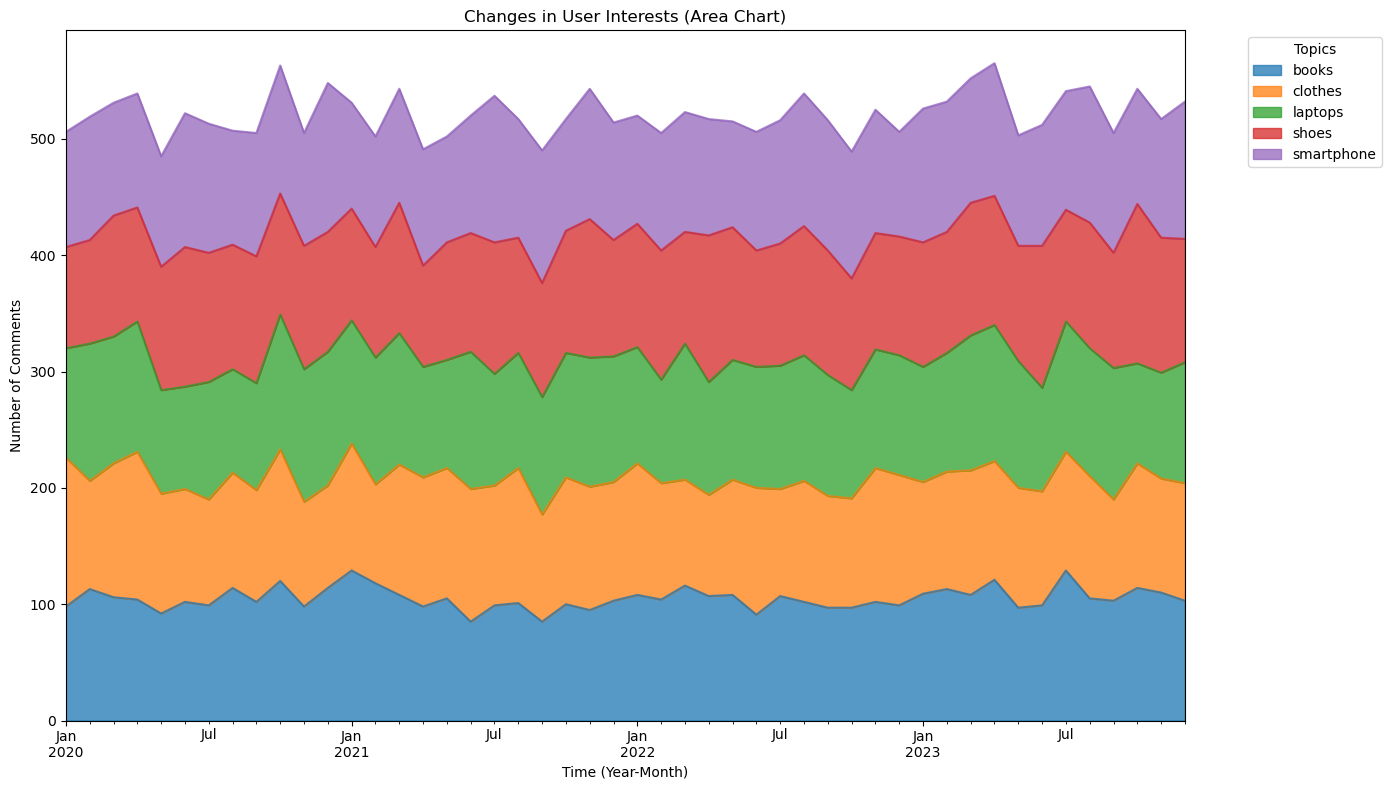

In [9]:
import matplotlib.pyplot as plt
import pandas as pd

# Đọc tệp CSV
data = pd.read_csv('user_comments_updated.csv')

# Chuyển đổi cột 'Timestamp' sang định dạng datetime
data['Timestamp'] = pd.to_datetime(data['Timestamp'])

# Trích xuất thông tin năm-tháng để nhóm dữ liệu
data['YearMonth'] = data['Timestamp'].dt.to_period('M')

# Đếm số lượng bình luận theo chủ đề qua từng tháng
topic_trends = data.groupby(['YearMonth', 'Topic']).size().unstack(fill_value=0)

# Biểu đồ đường (Line Plot)
plt.figure(figsize=(14, 8))
topic_trends.plot(kind='line', marker='o', figsize=(14, 8), title="Changes in User Interests (Line Chart)")
plt.xlabel("Time (Year-Month)")
plt.ylabel("Number of Comments")
plt.title("Changes in User Interests (Line Chart)")
plt.legend(title="Topics", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Biểu đồ cột (Bar Plot)
plt.figure(figsize=(14, 8))
topic_trends.plot(kind='bar', stacked=True, figsize=(14, 8), title="Changes in User Interests (Bar Chart)")
plt.xlabel("Time (Year-Month)")
plt.ylabel("Number of Comments")
plt.title("Changes in User Interests (Bar Chart)")
plt.legend(title="Topics", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Biểu đồ diện tích (Area Plot)
plt.figure(figsize=(14, 8))
topic_trends.plot(kind='area', alpha=0.75, figsize=(14, 8), title="Changes in User Interests (Area Chart)")
plt.xlabel("Time (Year-Month)")
plt.ylabel("Number of Comments")
plt.title("Changes in User Interests (Area Chart)")
plt.legend(title="Topics", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
